In [1]:
import numpy as np
from pandas_datareader import data as pdr
import datetime as dt
import mplfinance as mpf
import yfinance as yf
import pandas as pd

In [2]:
start = dt.datetime(2010,1,1)
end = dt.datetime.today()
yf.pdr_override()
df = pdr.get_data_yahoo('ITC.NS',start,end)
df=df[df['Volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
# df.drop('Close',axis='columns',inplace=True)
df.tail()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
3534,438.000000,440.450012,433.350006,434.750000,434.750000,10355056
3535,436.899994,446.000000,435.200012,440.350006,440.350006,25968921
3536,441.250000,444.700012,438.200012,441.000000,441.000000,10511646
3537,440.049988,441.500000,423.350006,425.100006,425.100006,23412609
3538,426.500000,436.350006,426.500000,433.350006,433.350006,13985963


In [3]:
import pandas_ta as pa

In [4]:
df['RSI']=pa.rsi(df.Close, length=15)
df['EMAF']=pa.ema(df.Close, length=20)
df['EMAM']=pa.ema(df.Close, length=100)
df['EMAS']=pa.ema(df.Close, length=150)
df["ATR"] = pa.atr(df.High, df.Low, df.Close, length=16)
df["WPR"] = pa.willr(df.High, df.Low, df.Close, length=16)
a = pa.macd(df.Close)
df = df.join(a)
df['Target'] = df['Close']-df.Open
df['Target'] = df['Target'].shift(-1)

df['TargetClass'] = [1 if df.Target[i]>0 else 0 for i in range(len(df))]

df['TargetNextClose'] = df['Adj Close'].shift(-1)

df.dropna(inplace=True)
df.reset_index(inplace = True)
df.drop(['Volume', 'Close','index','Low','High','Open'], axis=1, inplace=True)

C:\Users\91907\AppData\Local\Temp\ipykernel_2620\246344208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI']=pa.rsi(df.Close, length=15)
C:\Users\91907\AppData\Local\Temp\ipykernel_2620\246344208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMAF']=pa.ema(df.Close, length=20)
C:\Users\91907\AppData\Local\Temp\ipykernel_2620\246344208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [5]:
df

,Adj Close,RSI,EMAF,EMAM,EMAS,ATR,WPR,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,Target,TargetClass,TargetNextClose
0,76.788170,69.737957,102.245213,95.011617,90.554888,2.288205,-4.629644,1.735743,0.376781,1.358962,-1.466667,0,75.966888
1,75.966888,63.679353,102.491701,95.206107,90.744007,2.295192,-10.925929,1.728062,0.295280,1.432782,-0.699997,0,74.855766
2,74.855766,56.556870,102.568682,95.366382,90.910312,2.272575,-19.444444,1.580034,0.117801,1.462232,0.300003,1,73.889580
3,73.889580,51.219419,102.511347,95.497080,91.056753,2.288873,-26.851866,1.339688,-0.098035,1.437724,2.166664,1,75.483795
4,75.483795,58.194203,102.668996,95.668755,91.230395,2.314570,-35.665963,1.311614,-0.100887,1.412502,0.433334,1,76.449989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,436.450012,57.417041,430.933506,431.422474,431.923820,7.437045,-25.091497,3.993161,0.786888,3.206274,-3.250000,0,434.750000
3385,434.750000,55.520903,431.296981,431.488366,431.961253,7.415980,-31.318651,3.793098,0.469459,3.323638,3.450012,1,440.350006
3386,440.350006,60.163969,432.159174,431.663844,432.072362,7.655606,-18.833313,4.039851,0.572970,3.466881,-0.250000,0,441.000000
3387,441.000000,60.674482,433.001158,431.848718,432.190609,7.583381,-16.666667,4.238989,0.617686,3.621302,-14.949982,0,425.100006


In [6]:
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

Adj Close          0
RSI                0
EMAF               0
EMAM               0
EMAS               0
ATR                0
WPR                0
MACD_12_26_9       0
MACDh_12_26_9      0
MACDs_12_26_9      0
Target             0
TargetClass        0
TargetNextClose    0
dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
sc2 = MinMaxScaler(feature_range=(0,1))
splitlimit = int(len(df)*0.8)
print(splitlimit)
train_split=df[:splitlimit]
test_split = df[splitlimit:]
# X_train, X_test = X[:splitlimit], X[splitlimit:]
# y_train, y_test = y[:splitlimit], y[splitlimit:]
train_split = sc.fit_transform(train_split)
test_split = sc.transform(test_split)
print(train_split)

2711
[[0.01987664 0.82048124 0.         ... 0.50027182 0.         0.01580546]
 [0.01580546 0.73666387 0.00110499 ... 0.52528555 0.         0.0102975 ]
 [0.0102975  0.63812831 0.00145009 ... 0.557912   1.         0.005508  ]
 ...
 [0.62185035 0.74865316 0.473489   ... 0.51060375 0.         0.61728543]
 [0.61728543 0.71682883 0.4762147  ... 0.50897232 0.         0.61523113]
 [0.61523113 0.70228187 0.47848868 ... 0.4127244  0.         0.59719926]]


In [8]:
X_train = []
backcandles = 30
print(train_split.shape[0])
for j in range(8):
    X_train.append([])
    for i in range(backcandles, train_split.shape[0]):#backcandles+2
        X_train[j].append(train_split[i-backcandles:i, j])

#move axis from 0 to position 2
X_train=np.moveaxis(X_train, [0], [2])

X_train =np.array(X_train)
y_train=df.iloc[30:splitlimit,0].values
y_train = y_train.reshape(len(y_train),1)
print(X_train)
print(X_train.shape)
print(y_train)
print(y_train.shape)

2711
[[[0.01987664 0.82048124 0.         ... 0.00754254 0.95880082 0.68984084]
  [0.01580546 0.73666387 0.00110499 ... 0.00827982 0.89509906 0.68955851]
  [0.0102975  0.63812831 0.00145009 ... 0.00589345 0.8089142  0.68411778]
  ...
  [0.04011239 0.7169656  0.02941802 ... 0.01405423 0.82000075 0.68734525]
  [0.04238736 0.73714565 0.03088068 ... 0.01130706 0.90817921 0.69005511]
  [0.06226389 0.87050473 0.03456647 ... 0.03994538 0.93559722 0.70767245]]

 [[0.01580546 0.73666387 0.00110499 ... 0.00827982 0.89509906 0.68955851]
  [0.0102975  0.63812831 0.00145009 ... 0.00589345 0.8089142  0.68411778]
  [0.005508   0.56428768 0.00119306 ... 0.00761308 0.73397068 0.67528397]
  ...
  [0.04238736 0.73714565 0.03088068 ... 0.01130706 0.90817921 0.69005511]
  [0.06226389 0.87050473 0.03456647 ... 0.03994538 0.93559722 0.70767245]
  [0.05268482 0.74809201 0.03676271 ... 0.05756157 0.68217699 0.71272633]]

 [[0.0102975  0.63812831 0.00145009 ... 0.00589345 0.8089142  0.68411778]
  [0.005508   0.5

In [9]:
X_test = []
backcandles = 30
print(test_split.shape[0])
for j in range(8):
    X_test.append([])
    for i in range(backcandles, test_split.shape[0]):#backcandles+2
        X_test[j].append(test_split[i-backcandles:i, j])

#move axis from 0 to position 2
X_test=np.moveaxis(X_test, [0], [2])

X_test=np.array(X_test)
y_test=df.iloc[30+splitlimit:,0].values
y_test = y_test.reshape(len(y_test),1)
print(X_test)
print(X_test.shape)
print(y_test)
print(y_test.shape)

678
[[[0.59719926 0.58622055 0.47885966 ... 0.17174231 0.41714138 0.68873255]
  [0.59172114 0.55501416 0.47868297 ... 0.16716291 0.32040064 0.67944475]
  [0.59286239 0.56147577 0.47862985 ... 0.18067448 0.34055476 0.67229243]
  ...
  [0.70630331 0.98040926 0.51227482 ... 0.25631455 0.84117835 0.81270757]
  [0.74168236 1.03224315 0.52294088 ... 0.29656676 0.97927169 0.86176279]
  [0.75081236 1.04310232 0.53344502 ... 0.29704489 0.94527754 0.9033741 ]]

 [[0.59172114 0.55501416 0.47868297 ... 0.16716291 0.32040064 0.67944475]
  [0.59286239 0.56147577 0.47862985 ... 0.18067448 0.34055476 0.67229243]
  [0.60450332 0.6248803  0.47967049 ... 0.17718542 0.54612698 0.67363831]
  ...
  [0.74168236 1.03224315 0.52294088 ... 0.29656676 0.97927169 0.86176279]
  [0.75081236 1.04310232 0.53344502 ... 0.29704489 0.94527754 0.9033741 ]
  [0.74624728 1.01062849 0.54252181 ... 0.28957988 0.9149142  0.9298831 ]]

 [[0.59286239 0.56147577 0.47862985 ... 0.18067448 0.34055476 0.67229243]
  [0.60450332 0.62

In [10]:
y_train = sc2.fit_transform(y_train)
y_test = sc2.transform(y_test)

In [11]:
y_train.shape

(2681, 1)

In [12]:
y_test.shape

(648, 1)

In [20]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer',activation='relu')(lstm_input)
# inputs = LSTM(200, name='second_layer')(inputs)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=32, epochs=75, shuffle=True, validation_split = 0.1)

Epoch 1/75
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0537 - val_loss: 0.0077
Epoch 2/75
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.7181e-04 - val_loss: 0.0093
Epoch 3/75
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.1155e-04 - val_loss: 0.0084
Epoch 4/75
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.5833e-04 - val_loss: 0.0066
Epoch 5/75
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.3183e-04 - val_loss: 0.0093
Epoch 6/75
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.7240e-04 - val_loss: 0.0075
Epoch 7/75
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.7517e-04 - val_loss: 0.0062
Epoch 8/75
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.4712e-04 - val_loss: 0.0059
Epoch 9/75
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.2234e-04 - val_loss: 0.0062
Epoch 10/75
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.7332e-04 - val_loss: 0.0039
Epoch 11/75
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.4809e-04 - val_loss: 0.0060
Epoch 12/75
76/76 ━━━━━

In [21]:
y_pred = model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
[0.65674627] [0.74624728]
[0.660424] [0.727759]
[0.64848775] [0.72890025]
[0.64745414] [0.72456353]
[0.6444107] [0.72616119]
[0.6460001] [0.7172594]
[0.64025164] [0.71360737]
[0.6370818] [0.71931369]
[0.64082307] [0.7106401]
[0.63436925] [0.69489073]


In [22]:
y_pred.shape


(648, 1)

In [23]:
import matplotlib.pyplot as plt

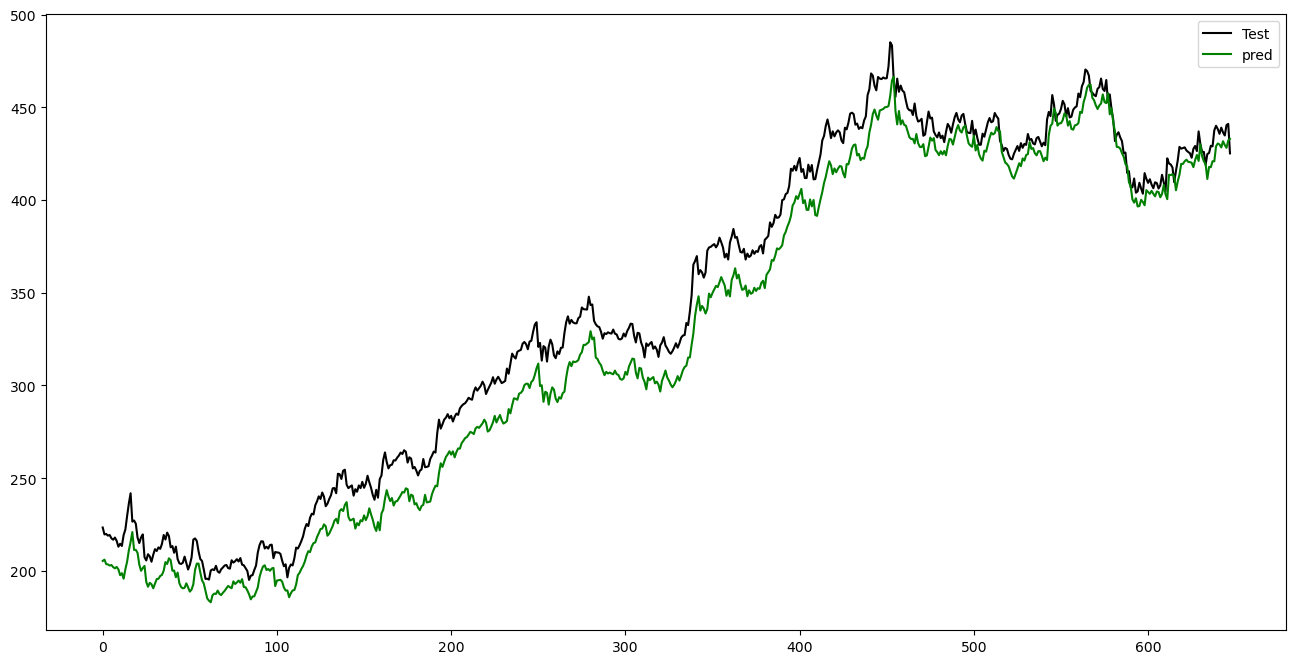

In [24]:
plt.figure(figsize=(16,8))
plt.plot(sc2.inverse_transform(y_test), color = 'black', label = 'Test')
plt.plot(sc2.inverse_transform(y_pred), color = 'green', label = 'pred')
plt.legend()
plt.show()

In [25]:
model.save('LSTMtechnicalind32_75_r.keras')

In [26]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,y_pred))

0.0841634091414348